In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 150)


import cv2
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

Populating the interactive namespace from numpy and matplotlib


In [3]:
img = cv2.imread('../data/outputs/mona_ava_AA.jpg').astype(np.float32)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,dsize=(200,200))
img = img/img.max()


L = cv2.imread('../data/raw/mona.png').astype(np.float32)
# L = cv2.cvtColor(L, cv2.COLOR_BGR2GRAY)
L = cv2.resize(L,dsize=(200,200))
L = L/L.max()

In [4]:
def wlsFilter(IN,lamb=1, alpha=1.2, L=None):
    output = np.zeros_like(IN)
   

    def wlsFilter_helper(IN, lamb=1, alpha=1.2, L=None): 

        smallNum = 0.0001

        r,c = IN.shape
        k = r*c

        dy = np.diff(L,1,0)

        dy = -lamb/(np.abs(dy)**alpha + smallNum)
        dy = np.pad(dy, ((0 ,1),(0,0)),mode='constant')
        dy = dy.flatten()

        dx = np.diff(L, 1, 1); 
        dx = -lamb/(np.abs(dx)**alpha + smallNum);
        dx = np.pad(dx, ((0 ,0),(0,1)),mode='constant')
        dx = dx.flatten()

        B = np.zeros(shape=(dx.shape[0],2))
        B[:,0] = dx
        B[:,1] = dy;
        d = np.array([-r,-1])

        A = spdiags(B.T,d,k,k)

        e = dx
        w = np.pad(dx, ((r,0)) ,mode= 'constant')
        w = w[0:-r]

        s = dy
        n = np.pad(dy, ((1,0)), mode= 'constant')
        n = n[0:-1]

        D = 1-(e+w+s+n)
        A = A + A.T + spdiags(D.T, 0, k, k)
        OUT = spsolve(A,IN.flatten())

        OUT = np.reshape(OUT, (r, c))

        return OUT
    output[:,:,0] = wlsFilter_helper(img[:,:,0],lamb=lamb,alpha=alpha,L=L[:,:,0])
    output[:,:,1] = wlsFilter_helper(img[:,:,1],lamb=lamb,alpha=alpha,L=L[:,:,1])
    output[:,:,2] = wlsFilter_helper(img[:,:,2],lamb=lamb,alpha=alpha,L=L[:,:,2])
    return output
    

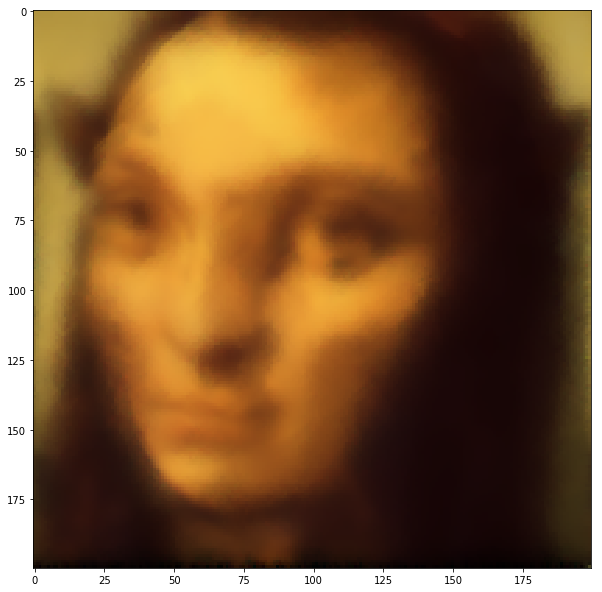

In [15]:
final  = wlsFilter(img,L=L,alpha=.7,lamb=.7)[:,:,::-1] #+ img[:,:,::-1]- wlsFilter(L,L=L,lamb=1.,alpha=.3)[:,:,::-1]
final = np.clip(final,0,1)
plt.imshow(final)

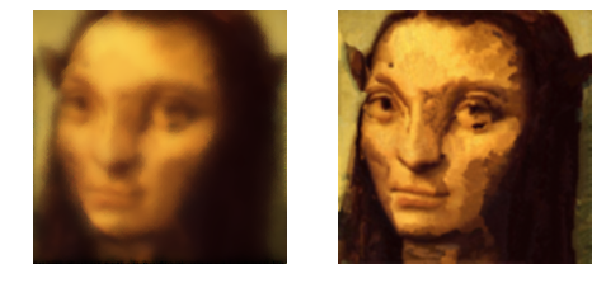

In [16]:
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(final)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img[:,:,::-1])
plt.show()